# 2. Data Exploration and Preprocessing

In this section the data is loaded and explored. The data is preprocessed and transformed into a format that can be used for the machine learning models.
This includes:
* Loading the data from the csv file and loading python libraries
* Exploring Target and Features
    * Checking for missing values
    * Exploring the target, number of accidents by accident types
    * Exploring the features
        * Number of accidents by type and day of the week
        * Number of accidents by type and hour of the day
        * Number of accidents by type and month
        * Number of accidents by type and road type
* Encoding Ordinal and Categorical Features
* Normalizing the data

## 2.1 Import Libraries and Load Data

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

# Load the data
data = pd.read_csv('roadtrafficaccidentlocations.csv')
data.head() 




,AccidentUID,AccidentType,AccidentType_de,AccidentType_fr,AccidentType_it,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentSeverityCategory_fr,AccidentSeverityCategory_it,...,AccidentMonth_fr,AccidentMonth_it,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_de,AccidentWeekDay_fr,AccidentWeekDay_it,AccidentWeekDay_en,AccidentHour,AccidentHour_text
0,9FC221265B5EE0F0E0430A865E33E0F0,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw405,Freitag,vendredi,Venerdì,Friday,8,08h-09h
1,9FC221265E13E0F0E0430A865E33E0F0,at7,Parkierunfall,accident en parquant,Incidente nel parcheggiare,Accident when parking,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw406,Samstag,samedi,Sabato,Saturday,17,17h-18h
2,9FC22126601FE0F0E0430A865E33E0F0,at3,Abbiegeunfall,accident en quittant une route,Incidente nello svoltare,Accident when turning left or right,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,10,10h-11h
3,9FC22126614DE0F0E0430A865E33E0F0,at2,Auffahrunfall,accident par tamponnement,Incidente di tamponamento,Accident with rear-end collision,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,13,13h-14h
4,9FC2212663A3E0F0E0430A865E33E0F0,at7,Parkierunfall,accident en parquant,Incidente nel parcheggiare,Accident when parking,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw403,Mittwoch,mercredi,Mercoledì,Wednesday,10,10h-11h


## 2.2 Feature Selection and Target Definition
The Data contains a lot of columns. We are only interested in the following columns as features:
* AccidentType_en
* RoadType_en
* AccidentMonth
* AccidentWeekDay_en
* AccidentHour
* AccidentInvolvedPederastrian
* AccidentInvolvedBicycle
* AccidentInvolvedMotorcycle

The target variable will be: 
* AccidentSeverityCategory_en

In [2]:
# Selecting the columns we are interested in
data = data[['AccidentSeverityCategory_en', 'AccidentType_en', 'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
       'AccidentInvolvingMotorcycle', 'RoadType_en', 'AccidentMonth', 'AccidentWeekDay_en', 'AccidentHour']]
data.head(3000)

,AccidentSeverityCategory_en,AccidentType_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType_en,AccidentMonth,AccidentWeekDay_en,AccidentHour
0,Accident with property damage,Accident with skidding or self-accident,False,False,False,Minor road,1,Friday,8
1,Accident with property damage,Accident when parking,False,False,False,Minor road,1,Saturday,17
2,Accident with property damage,Accident when turning left or right,False,False,False,Minor road,1,Thursday,10
3,Accident with property damage,Accident with rear-end collision,False,False,False,Principal road,1,Thursday,13
4,Accident with property damage,Accident when parking,False,False,False,Other,1,Wednesday,10
...,...,...,...,...,...,...,...,...,...
2995,Accident with severe injuries,Accident with rear-end collision,False,True,False,Minor road,4,Wednesday,9
2996,Accident with light injuries,Accident involving pedestrian(s),True,False,False,Minor road,4,Sunday,2
2997,Accident with property damage,Accident with skidding or self-accident,False,False,False,Principal road,3,Thursday,15
2998,Accident with light injuries,Accident with skidding or self-accident,False,True,False,Principal road,6,Sunday,3


## 2.3 Missing Values

Checking for missing values

In [3]:
for col in data.columns:
    print(col, data[col].isnull().sum())


AccidentSeverityCategory_en 0
AccidentType_en 0
AccidentInvolvingPedestrian 0
AccidentInvolvingBicycle 0
AccidentInvolvingMotorcycle 0
RoadType_en 0
AccidentMonth 0
AccidentWeekDay_en 0
AccidentHour 0


No missing values detected. It can be proceeded without further actions.

## 2.4 Target Exploration

At first the Target is explored. For This the number of accidents by type is plotted.

Text(0.5, 1.0, 'Number of Accidents by Severity')

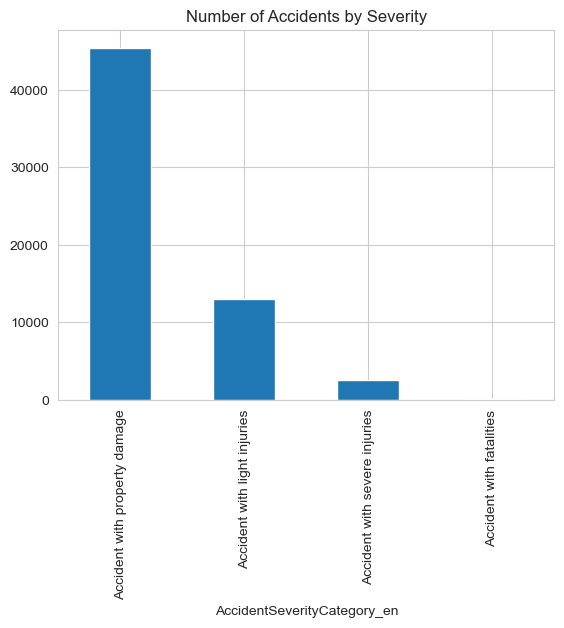

In [4]:
# Number of Accidents by Severity
data['AccidentSeverityCategory_en'].value_counts().plot(kind='bar')
plt.title('Number of Accidents by Severity')


The data looks a bit unbalanced. Since there are a lot of observations, this should not be a problem.
It can be observed that major accidents are such with property damage. Approximately three times less are accidents with light injuries. Accidents with sever injuries or fatalities happen quite less. 

In [5]:
# Number of Accidents of each accident type
data['AccidentSeverityCategory_en'].value_counts()


AccidentSeverityCategory_en
Accident with property damage    45427
Accident with light injuries     13006
Accident with severe injuries     2540
Accident with fatalities            85
Name: count, dtype: int64

## 2.5 Feature and target Exploration
### 2.5.1 Number of Accidents Severity and Day of the Week

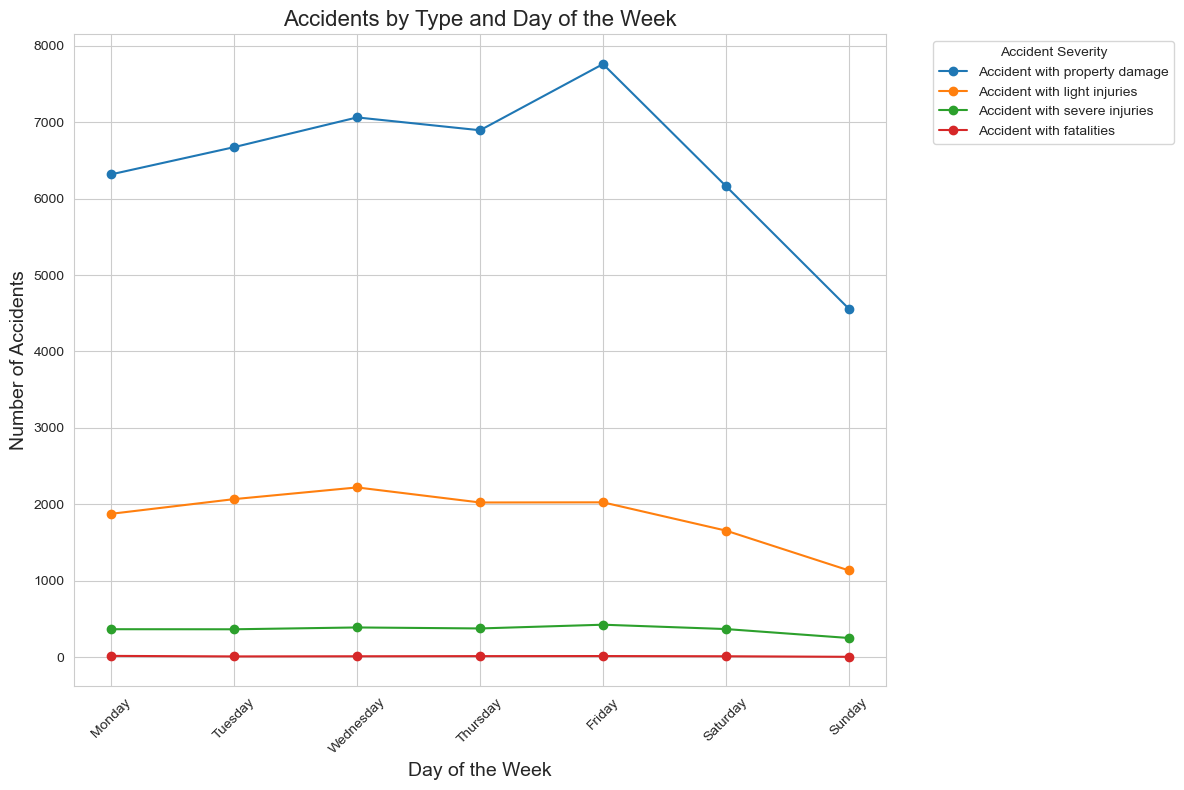

In [6]:
# numer of accidents by accident type and day of the week
# extracting the data
accidents_per_day = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentDay in data['AccidentWeekDay_en'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentWeekDay_en'] == AccidentDay)
        ].shape[0]
        counts.append(count)
    accidents_per_day[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
columns = data['AccidentWeekDay_en'].unique() 
result_df = pd.DataFrame.from_dict(accidents_per_day, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Type and Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
    
        

The number of accidents is quite constant over the week.
The number of accidents on weekends is lower than on weekdays. But an increase of accidents with property damage can be observed on Fridays.

### 2.5.2 Number of Accidents by Severity and Hour of the Day


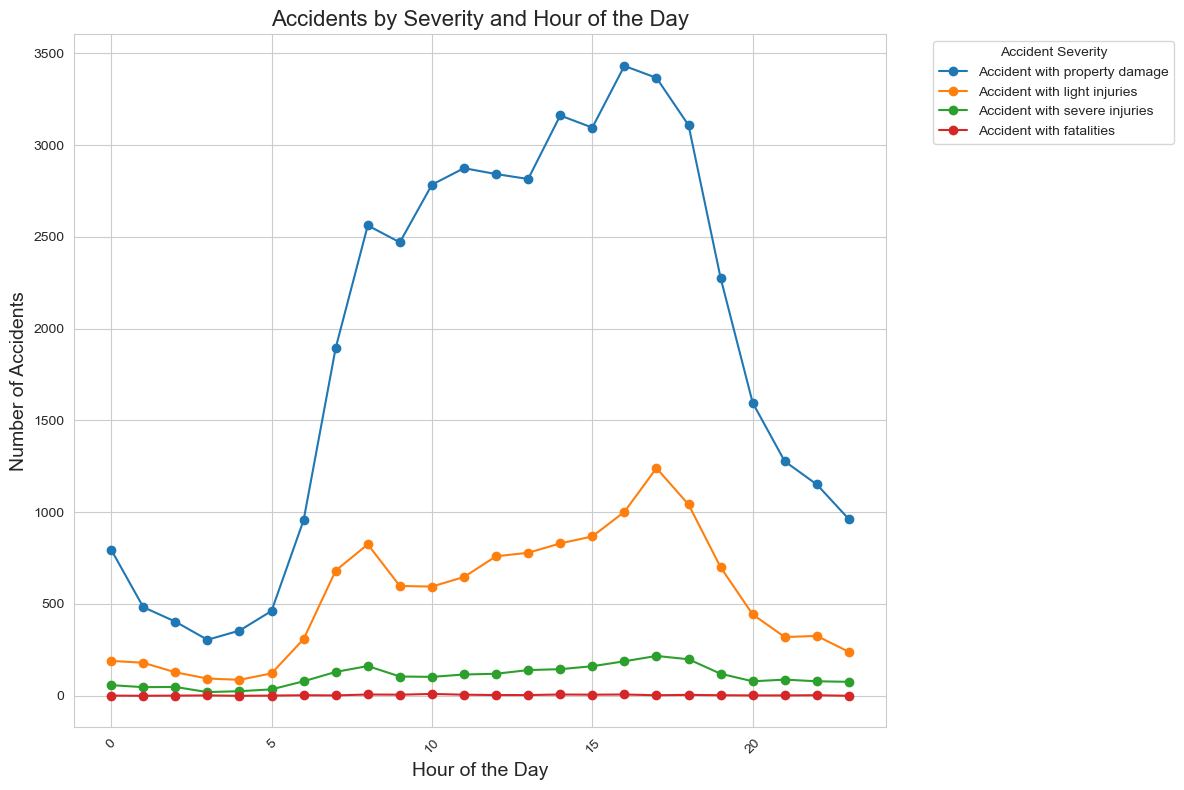

In [7]:
# numer of accidents by accident severity and hour of the day
# extracting the data
accidents_per_hour = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentHour in data['AccidentHour'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentHour'] == AccidentHour)
        ].shape[0]
        counts.append(count)
    accidents_per_hour[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
columns = data['AccidentHour'].unique()  
result_df = pd.DataFrame.from_dict(accidents_per_hour, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Severity and Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The number of accidents is the lowest between 1 and 5 o'clock. The number of accidents is the highest between 16 and 18 o'clock.
A tendency can be observed that the number of accidents increase towards the afternoon and evening hours.

### 2.5.3 Number of Accidents by Severity and Month

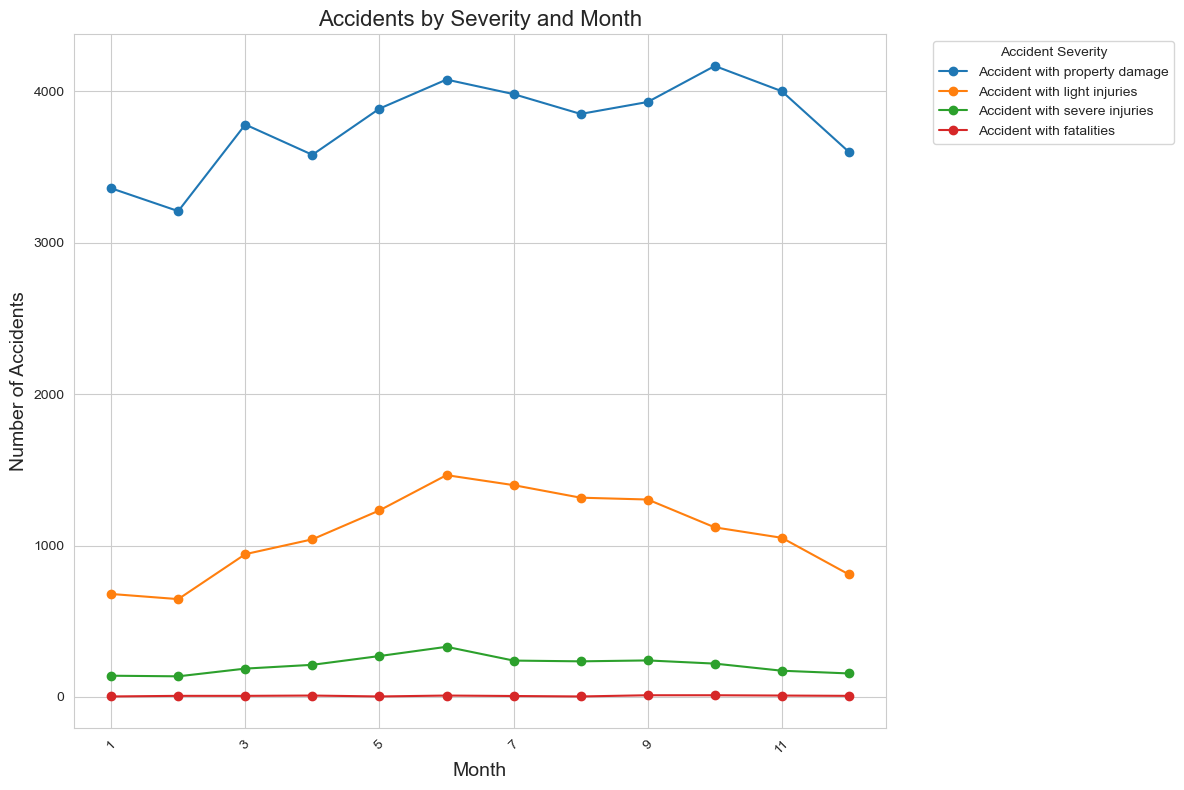

In [8]:
# numer of accidents by accident severity and month
# extracting the data
accidents_per_month = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentMonth in data['AccidentMonth'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentMonth'] == AccidentMonth)
        ].shape[0]
        counts.append(count)
    accidents_per_month[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
columns = data['AccidentMonth'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_month, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot

plt.title('Accidents by Severity and Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The number of accidents seems to be lower in winter months. The number of accidents is slightly higher in summer months. The difference is not that remarkable. 

### 2.5.4 Number of Accidents by Severity and Road Type

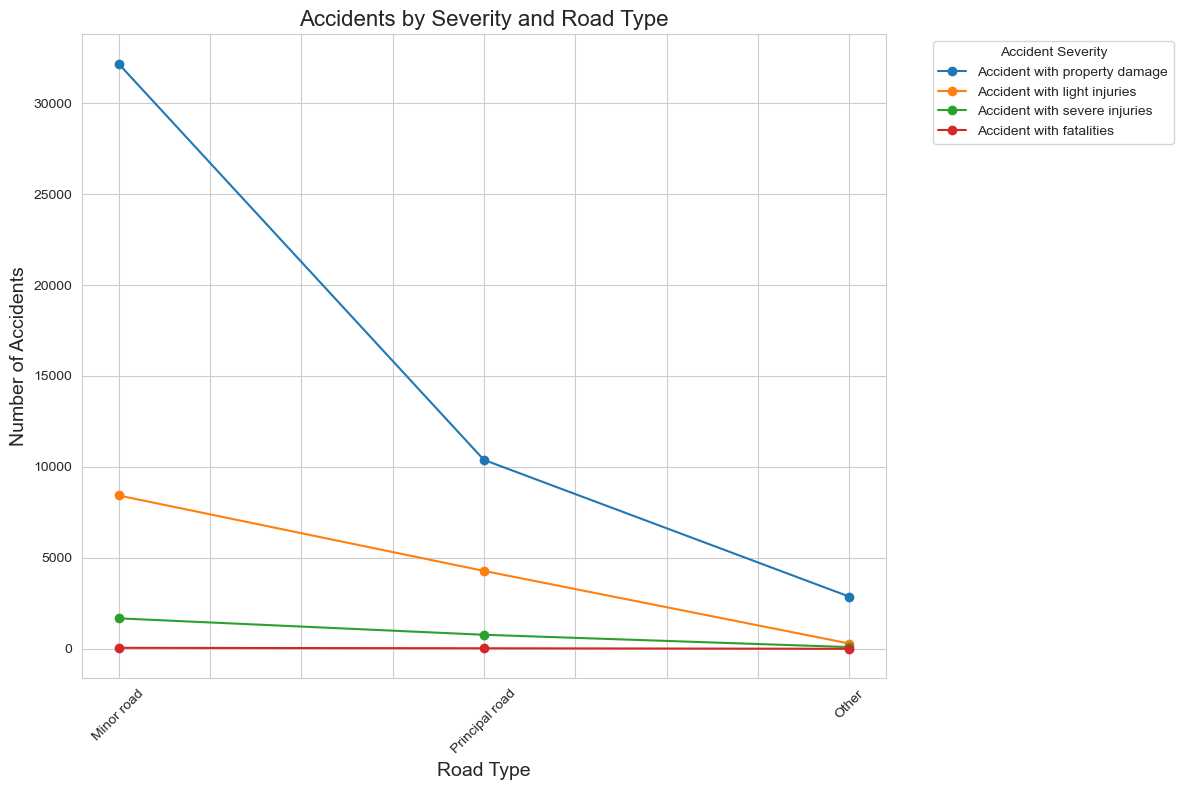

In [9]:
# numer of accidents by accident severity and road type
# extracting the data
accidents_per_road = {}

for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for RoadType in data['RoadType_en'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['RoadType_en'] == RoadType)
        ].shape[0]
        counts.append(count)
    accidents_per_road[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = ['Minor road', 'Principal road', 'Other']
columns = data['RoadType_en'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_road, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Severity and Road Type', fontsize=16)
plt.xlabel('Road Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
    
plt.show()



There are more accidents on minor roads than on principal roads. 
## 2.5.5 Number of Accidents by Severity and Type

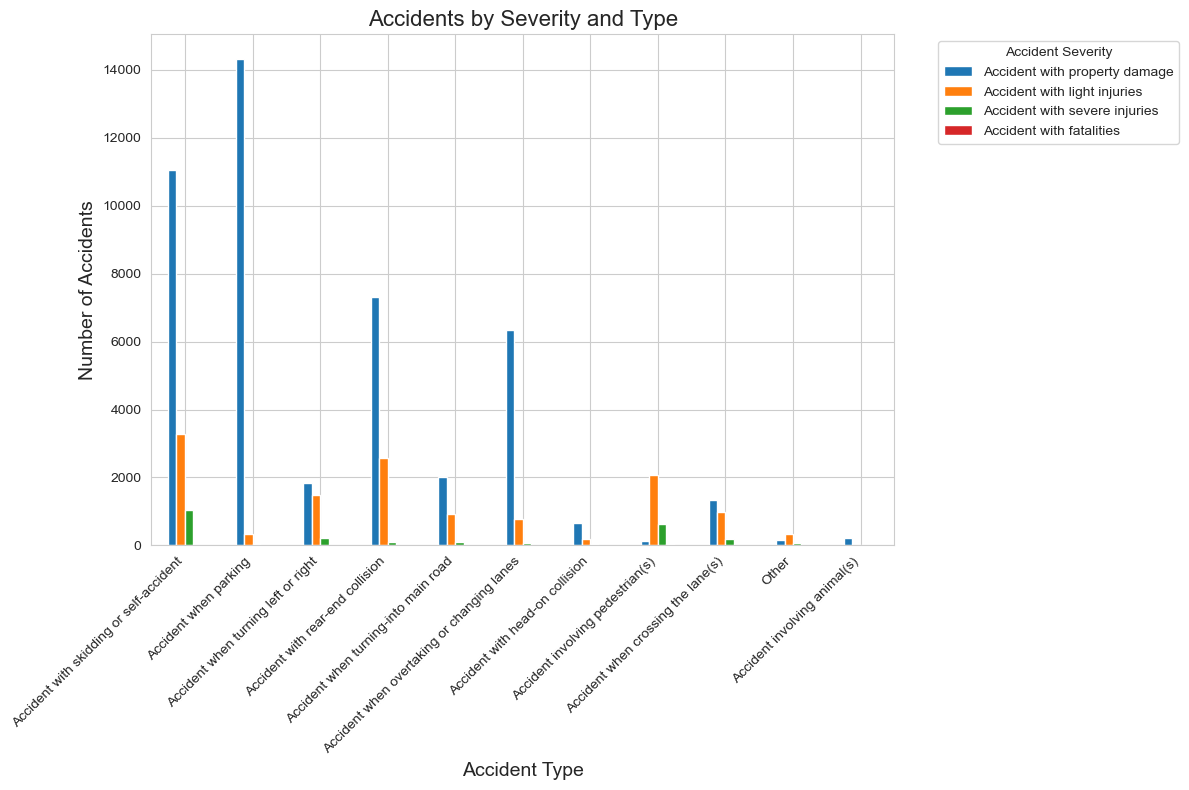

In [10]:
# numer of accidents by accident severity and day of the week
# extracting the data
accidents_per_type = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentType in data['AccidentType_en'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentType_en'] == AccidentType)
        ].shape[0]
        counts.append(count)
    accidents_per_type[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order =  data['AccidentType_en'].unique()
columns =  data['AccidentType_en'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_type, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.title('Accidents by Severity and Type', fontsize=16)
plt.xlabel('Accident Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()
    

Accidents with property damage often happens because of skidding, parking or changing lanes/overtaking. 

Light injuries ocurr in rear-end collisions, accidents with pedestrians, skidding or self-accidents.

Severe injuries also happen because of skidding and in accidents with pedestrians.

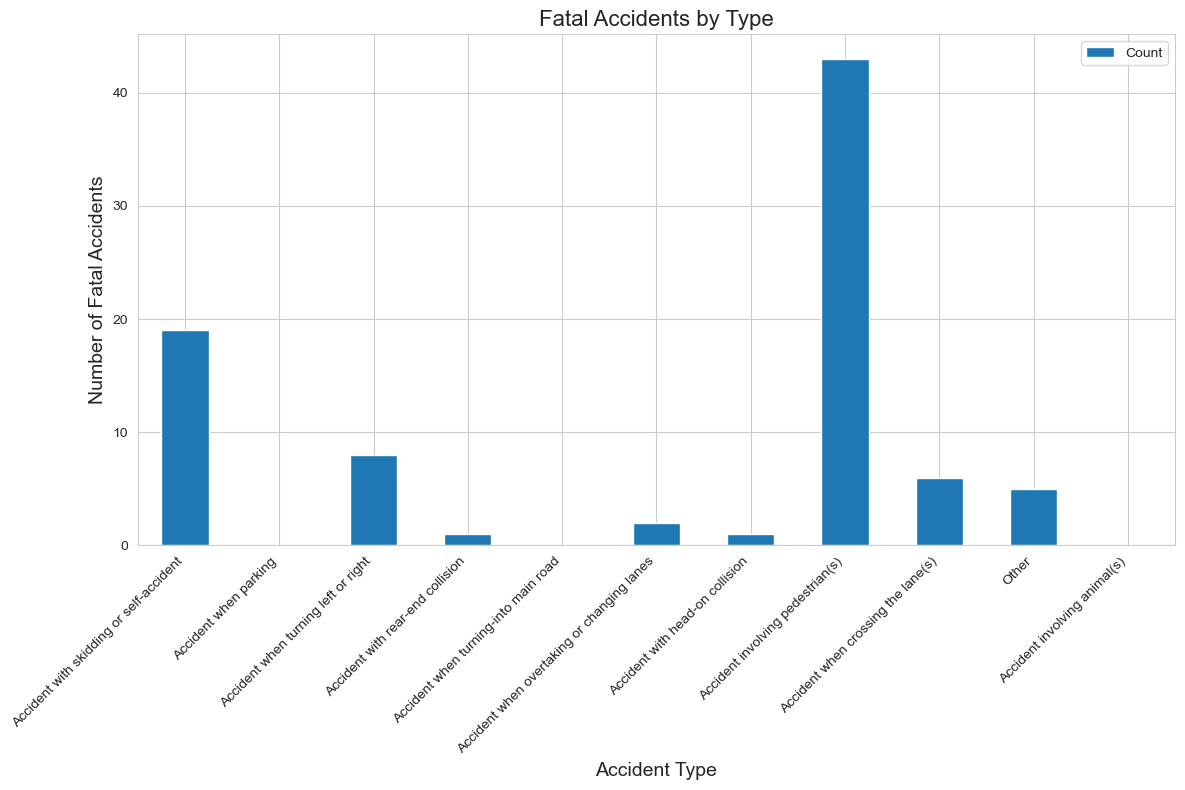

In [11]:
# Number of Accidents by Type and Fatalities
# Filter the data to include only accidents with fatalities
fatal_accidents = data[data['AccidentSeverityCategory_en'] == 'Accident with fatalities']

# Extracting the data
accidents_per_type = {}
for AccidentType in fatal_accidents['AccidentType_en'].unique():
    count = fatal_accidents[fatal_accidents['AccidentType_en'] == AccidentType].shape[0]
    accidents_per_type[AccidentType] = count

# Create a pandas DataFrame from the extracted data
result_df = pd.DataFrame(list(accidents_per_type.items()), columns=['AccidentType', 'Count'])

# Ensure the order is the same as in the other plot
desired_order = data['AccidentType_en'].unique()
result_df = result_df.set_index('AccidentType').reindex(desired_order).reset_index()

# Plot the data
result_df.set_index('AccidentType').plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.title('Fatal Accidents by Type', fontsize=16)
plt.xlabel('Accident Type', fontsize=14)
plt.ylabel('Number of Fatal Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


The number of accidents with fatalities is quite low. Most of the accidents with fatalities happen in accidents involving pedestrians. 

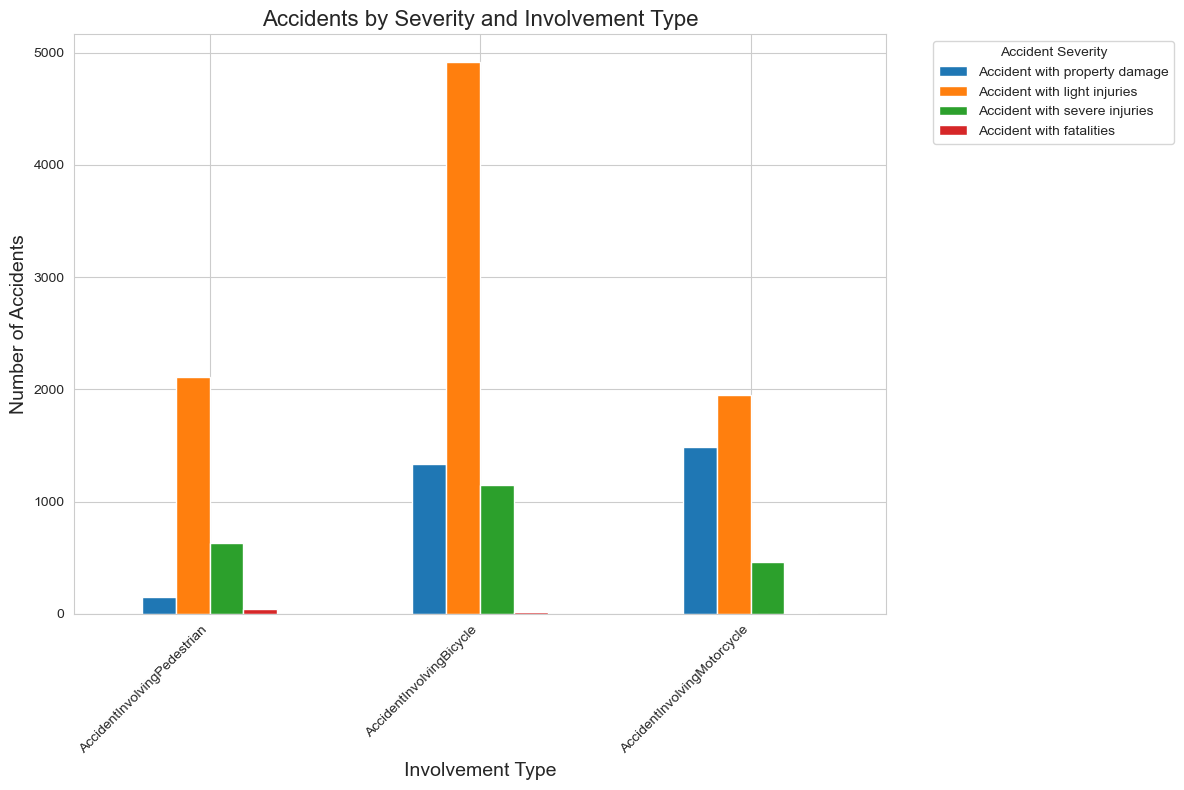

In [12]:
# numer of accidents by accident severity and Involvement of others
# extracting the data
accidents_per_involvement = {} 
involvement_columns = ['AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle'] 
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique(): 
    counts = [] 
    for Involvement in involvement_columns: 
        count = data.loc[ (data['AccidentSeverityCategory_en'] == AccidentSeverity) & (data[Involvement] == True) ].shape[0] 
        counts.append(count) 
        accidents_per_involvement[AccidentSeverity] = counts 
        
# Create a pandas DataFrame from the extracted data 
        
columns = involvement_columns 
result_df = pd.DataFrame.from_dict(accidents_per_involvement, orient='index', columns=columns) 

result_df.reset_index(inplace=True) 
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True) 

# Plot the data 
result_df.T.plot(kind='bar', figsize=(12, 8)) 

# Customize the plot 
plt.title('Accidents by Severity and Involvement Type', fontsize=16) 
plt.xlabel('Involvement Type', fontsize=14) 
plt.ylabel('Number of Accidents', fontsize=14) 
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.xticks(rotation=45, ha='right') 

plt.tight_layout() 
plt.show()



## 2.6 Encoding
The data has to be transformed into numerical values.
Firstly the unique values of the columns are checked.


In [13]:
# Check the unique values of the columns
for col in data.columns:
    print(col, data[col].unique())

AccidentSeverityCategory_en ['Accident with property damage' 'Accident with light injuries'
 'Accident with severe injuries' 'Accident with fatalities']
AccidentType_en ['Accident with skidding or self-accident' 'Accident when parking'
 'Accident when turning left or right' 'Accident with rear-end collision'
 'Accident when turning-into main road'
 'Accident when overtaking or changing lanes'
 'Accident with head-on collision' 'Accident involving pedestrian(s)'
 'Accident when crossing the lane(s)' 'Other'
 'Accident involving animal(s)']
AccidentInvolvingPedestrian [False  True]
AccidentInvolvingBicycle [False  True]
AccidentInvolvingMotorcycle [False  True]
RoadType_en ['Minor road' 'Principal road' 'Other']
AccidentMonth [ 1  2  3  4  5  6  7  8  9 10 11 12]
AccidentWeekDay_en ['Friday' 'Saturday' 'Thursday' 'Wednesday' 'Monday' 'Tuesday' 'Sunday']
AccidentHour [ 8 17 10 13 14  7  9 12 19 23 16  4 11 18 15  1  2 20  0  6 21  5 22  3]


Now the data has to be transformed into numerical values. 
* AccidentSeverity_en --> OrdinalEncoding (has hierarchical order)
* AccidentType_en --> OneHotEncoding
* RoadType_en --> OneHotEncoding
* AccidentMonth --> TrigonometricEncoding (Cyclic pattern)
* AccidentWeekDay_en --> OrdinalEncoding then TrigonometricEncoding (Cyclic pattern)
* AccidentHour --> TrigonometricEncoding (Cycle pattern)
* AccidentInvolvingPedestrian --> Boolean
* AccidentInvolvingBicycle --> Boolean
* AccidentInvolvingMotorcycle --> Boolean

Encoding of RoadType_en will be done with OneHotEncoding, because we didn't want to introduce a ranking of the different road types. This procedures is suitable for the planed models kNN, RandomForest and SVM. Unfortunately this will increase the dimensionality of the data.
Alternatively we could use OrdinalEncoding  which would have been quite straight forward. This would incude a ranking of the different road types.

Encoding of AccidentWeekDay_en will be done with OrdinalEncoding. This is simple and efficient. A drawback is that a possible cyclic pattern will not be considered. 
To ensure that the cyclic pattern is considered, we could use a CyclicEncoding. This would be more complex and is not implemented here.
## 2.6.1 Encoding of AccidentSeverityCategory_en, OrdinalEncoding

In [14]:
# Transform the data
# to check the transformation a new empty dataframe is created, where the transformed data will be stored
data_transformed = pd.DataFrame()

# Order of categories for AccidentSeverityCategory_en
categories_order = [['Accident with property damage','Accident with light injuries', 'Accident with severe injuries', 'Accident with fatalities']]

# OrdinalEncoding for AccidentSeverityCategory_en
OrdEN_Label = preprocessing.OrdinalEncoder(categories=categories_order)
# define the index to introduce a hierarchical order

# fit and transform the data   
data_transformed['AccidentSeverityCategory_en'] = OrdEN_Label.fit_transform(data['AccidentSeverityCategory_en'].values.reshape(-1,1)).flatten()

# check the transformed column against the original column
data_transformed['AccidentSeverityCategory_en'].unique(), data['AccidentSeverityCategory_en'].unique()


(array([0., 1., 2., 3.]),
 array(['Accident with property damage', 'Accident with light injuries',
        'Accident with severe injuries', 'Accident with fatalities'],
       dtype=object))

## 2.6.2 Encoding of AccidentType_en, OneHotEncoding

In [15]:
# OneHotEncoding for AccidentType_en
OHE = preprocessing.OneHotEncoder()

OHE_AccidentType_en = data['AccidentType_en'].values.reshape(-1,1)
OHE_AccidentType_en = OHE.fit_transform(OHE_AccidentType_en).toarray()

# Delete AccidentType_en from pandas DataFrame and add the new columns from the OneHotEncoding
data_transformed = pd.concat([data_transformed, pd.DataFrame(OHE_AccidentType_en, columns=['Accident involving animal(s)', 
                                                                                           'Accident involving pedestrian(s)',
                                                                                           'Accident when crossing the lane(s)',
                                                                                           'Accident when overtaking or changing lanes', 
                                                                                           'Accident when parking', 
                                                                                           'Accident when turning left or right', 
                                                                                           'Accident when turning-into main road',
                                                                                           'Accident with head-on collision',
                                                                                           'Accident with rear-end collision',
                                                                                           'Accident with skidding or self-accident',
                                                                                           'Other'])], axis=1)

# check the transformed column against the original column
(data_transformed[[                                                                        'Accident with skidding or self-accident', 
                                                                                           'Accident when parking',
                                                                                           'Accident when turning left or right',
                                                                                           'Accident with rear-end collision', 
                                                                                           'Accident when turning-into main road', 
                                                                                           'Accident when overtaking or changing lanes', 
                                                                                           'Accident with head-on collision',
                                                                                           'Accident involving pedestrian(s)',
                                                                                           'Accident when crossing the lane(s)',
                                                                                           'Other',
                                                                                           'Accident involving animal(s)']].head(10)), data['AccidentType_en'].head(10)

(   Accident with skidding or self-accident  Accident when parking  \
 0                                      1.0                    0.0   
 1                                      0.0                    1.0   
 2                                      0.0                    0.0   
 3                                      0.0                    0.0   
 4                                      0.0                    1.0   
 5                                      0.0                    0.0   
 6                                      0.0                    0.0   
 7                                      0.0                    0.0   
 8                                      0.0                    0.0   
 9                                      0.0                    1.0   
 
    Accident when turning left or right  Accident with rear-end collision  \
 0                                  0.0                               0.0   
 1                                  0.0                               0.0 

## 2.6.3 Encoding of RoadType_en, OneHotEncoding

In [16]:


# OneHotEncoding for RoadType_en
OHE = preprocessing.OneHotEncoder()
OHE_RoadType_en = data['RoadType_en'].values.reshape(-1,1)
OHE_RoadType_en = OHE.fit_transform(OHE_RoadType_en).toarray()

# Add the new columns from the OneHotEncoding
data_transformed = pd.concat([data_transformed, pd.DataFrame(OHE_RoadType_en, columns=['Minor road', 'Other road type', 'Principal road'])], axis=1)

# show the three columns of the transformed data
data_transformed[['Minor road', 'Principal road', 'Other road type']].head(10), data['RoadType_en'].head(10)


(   Minor road  Principal road  Other road type
 0         1.0             0.0              0.0
 1         1.0             0.0              0.0
 2         1.0             0.0              0.0
 3         0.0             1.0              0.0
 4         0.0             0.0              1.0
 5         1.0             0.0              0.0
 6         1.0             0.0              0.0
 7         0.0             1.0              0.0
 8         1.0             0.0              0.0
 9         1.0             0.0              0.0,
 0        Minor road
 1        Minor road
 2        Minor road
 3    Principal road
 4             Other
 5        Minor road
 6        Minor road
 7    Principal road
 8        Minor road
 9        Minor road
 Name: RoadType_en, dtype: object)

## 2.6.4 Encoding of AccidentMonth, TrigonometricEncoding

In [17]:
# Trigonometric encoding
data_transformed['AccidentMonth_sin'] = np.sin(2 * np.pi * data['AccidentMonth'] / 12)
data_transformed['AccidentMonth_cos'] = np.cos(2 * np.pi * data['AccidentMonth'] / 12)

# check the transformed column against the original column
data_transformed[['AccidentMonth_sin', 'AccidentMonth_cos']][:10], data['AccidentMonth'][:10]

(   AccidentMonth_sin  AccidentMonth_cos
 0                0.5           0.866025
 1                0.5           0.866025
 2                0.5           0.866025
 3                0.5           0.866025
 4                0.5           0.866025
 5                0.5           0.866025
 6                0.5           0.866025
 7                0.5           0.866025
 8                0.5           0.866025
 9                0.5           0.866025,
 0    1
 1    1
 2    1
 3    1
 4    1
 5    1
 6    1
 7    1
 8    1
 9    1
 Name: AccidentMonth, dtype: int64)

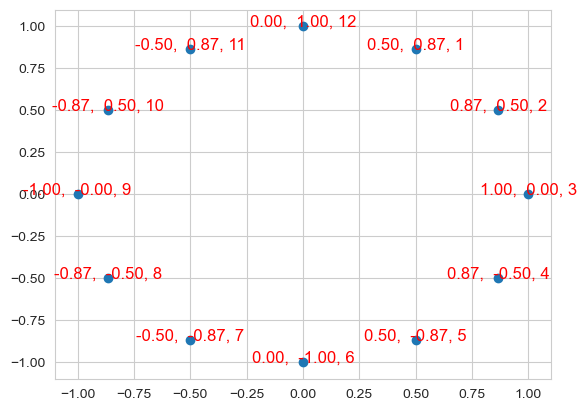

In [18]:
# Visualisation of the Trigonometric Encoding to map the months to the points in the circle
def calc_sin_cos(point, max_points):
    sin = np.sin(2 * np.pi * point / max_points)
    cos = np.cos(2 * np.pi * point / max_points)
    return sin, cos

sinus = []
cosinus = []

for i in range(12):
    sin, cos = calc_sin_cos(i, 12)
    sinus.append(sin)
    cosinus.append(cos)
    
fig, ax = plt.subplots()
ax.scatter(sinus, cosinus)

month = 12
for sin, cos in zip(sinus, cosinus):
    text = f"{sin:.2f},  {cos:.2f}, {month}"
    ax.text(sin, cos, text, fontsize=12, ha='center', color = 'red')
    month +=1
    if month > 12:
        month = 1
    
plt.show()

# 1 = January, 2 = February, 3 = March, 4 = April, 5 = May, 6 = June, 7 = July, 8 = August, 9 = September, 10 = October, 11 = November, 12 = December


## 2.6.5 Encoding of AccidentWeekDay_en, OrdinalEncoding and TrigonometricEncoding

In [19]:
# Trigonometric Encoding for AccidentWeekDay_en
# Firstly Ordinal Encoding the days of the week
# Order of categories for AccidentWeekDay_en
categories_order = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# OrdinalEncoding for AccidentWeekDay_en
OrdEN_Weekdays = preprocessing.OrdinalEncoder(categories=categories_order)

# fit and transform the data
data_transformed['AccidentWeekDay_en'] = OrdEN_Weekdays.fit_transform(data['AccidentWeekDay_en'].values.reshape(-1,1)).flatten()

# check the transformed column against the original column
data_transformed['AccidentWeekDay_en'].unique(), data['AccidentWeekDay_en'].unique()


(array([4., 5., 3., 2., 0., 1., 6.]),
 array(['Friday', 'Saturday', 'Thursday', 'Wednesday', 'Monday', 'Tuesday',
        'Sunday'], dtype=object))

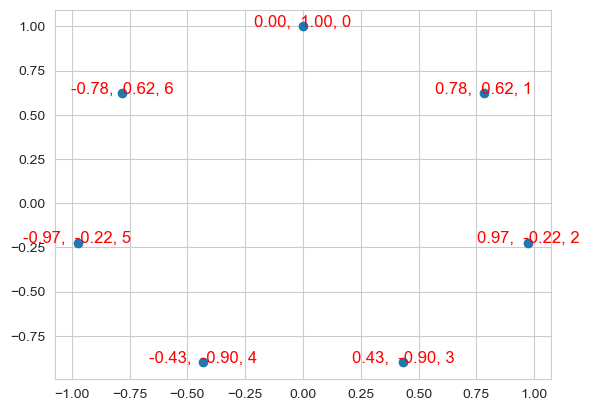

In [20]:
sinus = []
cosinus = []

for i in range(7):
    sin, cos = calc_sin_cos(i, 7)
    sinus.append(sin)
    cosinus.append(cos)
    
fig, ax = plt.subplots()
ax.scatter(sinus, cosinus)

weekday = 0
for sin, cos in zip(sinus, cosinus):
    text = f"{sin:.2f},  {cos:.2f}, {weekday}"
    ax.text(sin, cos, text, fontsize=12, ha='center', color = 'red')
    weekday +=1
    
plt.show()

# 0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday

In [21]:
data_transformed['AccidentWeekDay_sin'] = np.sin(2 * np.pi * data_transformed['AccidentWeekDay_en'] / 7)
data_transformed['AccidentWeekDay_cos'] = np.cos(2 * np.pi * data_transformed['AccidentWeekDay_en'] / 7)

# Drop the ordinal encoded column
data_transformed.drop('AccidentWeekDay_en', axis=1, inplace=True)

# check the transformed column against the original column
data_transformed[['AccidentWeekDay_sin', 'AccidentWeekDay_cos']][:10], data['AccidentWeekDay_en'][:10]

(   AccidentWeekDay_sin  AccidentWeekDay_cos
 0            -0.433884            -0.900969
 1            -0.974928            -0.222521
 2             0.433884            -0.900969
 3             0.433884            -0.900969
 4             0.974928            -0.222521
 5            -0.433884            -0.900969
 6             0.000000             1.000000
 7             0.433884            -0.900969
 8            -0.974928            -0.222521
 9             0.000000             1.000000,
 0       Friday
 1     Saturday
 2     Thursday
 3     Thursday
 4    Wednesday
 5       Friday
 6       Monday
 7     Thursday
 8     Saturday
 9       Monday
 Name: AccidentWeekDay_en, dtype: object)

## 2.6.6 Encoding of AccidentHour, TrigonometricEncoding

In [22]:
# Encoding AccidentHour, TrigonometricEncoding
data_transformed['AccidentHour_sin'] = np.sin(2 * np.pi * data['AccidentHour'] / 24)
data_transformed['AccidentHour_cos'] = np.cos(2 * np.pi * data['AccidentHour'] / 24)

# check the transformed column against the original column
data_transformed[['AccidentHour_sin', 'AccidentHour_cos']][:10], data['AccidentHour'][:10]


(   AccidentHour_sin  AccidentHour_cos
 0          0.866025         -0.500000
 1         -0.965926         -0.258819
 2          0.500000         -0.866025
 3         -0.258819         -0.965926
 4          0.500000         -0.866025
 5         -0.500000         -0.866025
 6          0.866025         -0.500000
 7          0.965926         -0.258819
 8          0.707107         -0.707107
 9         -0.258819         -0.965926,
 0     8
 1    17
 2    10
 3    13
 4    10
 5    14
 6     8
 7     7
 8     9
 9    13
 Name: AccidentHour, dtype: int64)

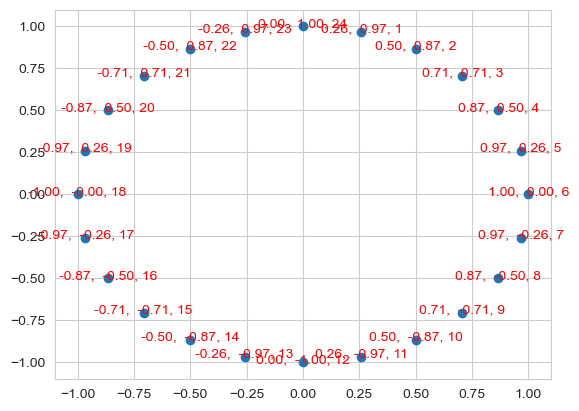

In [23]:
# Plot the Trigonometric Encoding to map the hours to the points
sinus = []
cosinus = []

for i in range(24):
    sin, cos = calc_sin_cos(i, 24)
    sinus.append(sin)
    cosinus.append(cos)
    
fig, ax = plt.subplots()
ax.scatter(sinus, cosinus)

hour = 24
for sin, cos in zip(sinus, cosinus):
    text = f"{sin:.2f},  {cos:.2f}, {hour}"
    ax.text(sin, cos, text, fontsize=10, ha='center', color = 'red')
    hour +=1
    if hour > 24:
        hour = 1
    
plt.show()


## 2.6.7 Encode AccidentInvolving(Pedestrians, Bicycle, Motorcycle), BooleanEncoding


In [24]:
# Adding the columns with the boolean values
data_transformed['AccidentInvolvingPedestrian'] = data['AccidentInvolvingPedestrian']
data_transformed['AccidentInvolvingBicycle'] = data['AccidentInvolvingBicycle']
data_transformed['AccidentInvolvingMotorcycle'] = data['AccidentInvolvingMotorcycle']

# change the entries to 0 and 1
data_transformed['AccidentInvolvingPedestrian'] = data_transformed['AccidentInvolvingPedestrian'].astype(int)
data_transformed['AccidentInvolvingBicycle'] = data_transformed['AccidentInvolvingBicycle'].astype(int)
data_transformed['AccidentInvolvingMotorcycle'] = data_transformed['AccidentInvolvingMotorcycle'].astype(int)

# Check the transformed data
data_transformed.head(20)

,AccidentSeverityCategory_en,Accident involving animal(s),Accident involving pedestrian(s),Accident when crossing the lane(s),Accident when overtaking or changing lanes,Accident when parking,Accident when turning left or right,Accident when turning-into main road,Accident with head-on collision,Accident with rear-end collision,...,Principal road,AccidentMonth_sin,AccidentMonth_cos,AccidentWeekDay_sin,AccidentWeekDay_cos,AccidentHour_sin,AccidentHour_cos,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,-0.433884,-0.900969,8.660254e-01,-0.500000,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,-0.974928,-0.222521,-9.659258e-01,-0.258819,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.433884,-0.900969,5.000000e-01,-0.866025,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.5,0.866025,0.433884,-0.900969,-2.588190e-01,-0.965926,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.974928,-0.222521,5.000000e-01,-0.866025,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.5,0.866025,-0.433884,-0.900969,-5.000000e-01,-0.866025,0,0,0
6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.000000,1.000000,8.660254e-01,-0.500000,0,1,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.5,0.866025,0.433884,-0.900969,9.659258e-01,-0.258819,0,0,0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.5,0.866025,-0.974928,-0.222521,7.071068e-01,-0.707107,0,0,0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.000000,1.000000,-2.588190e-01,-0.965926,0,0,0


# 2.7 Correlation Plot

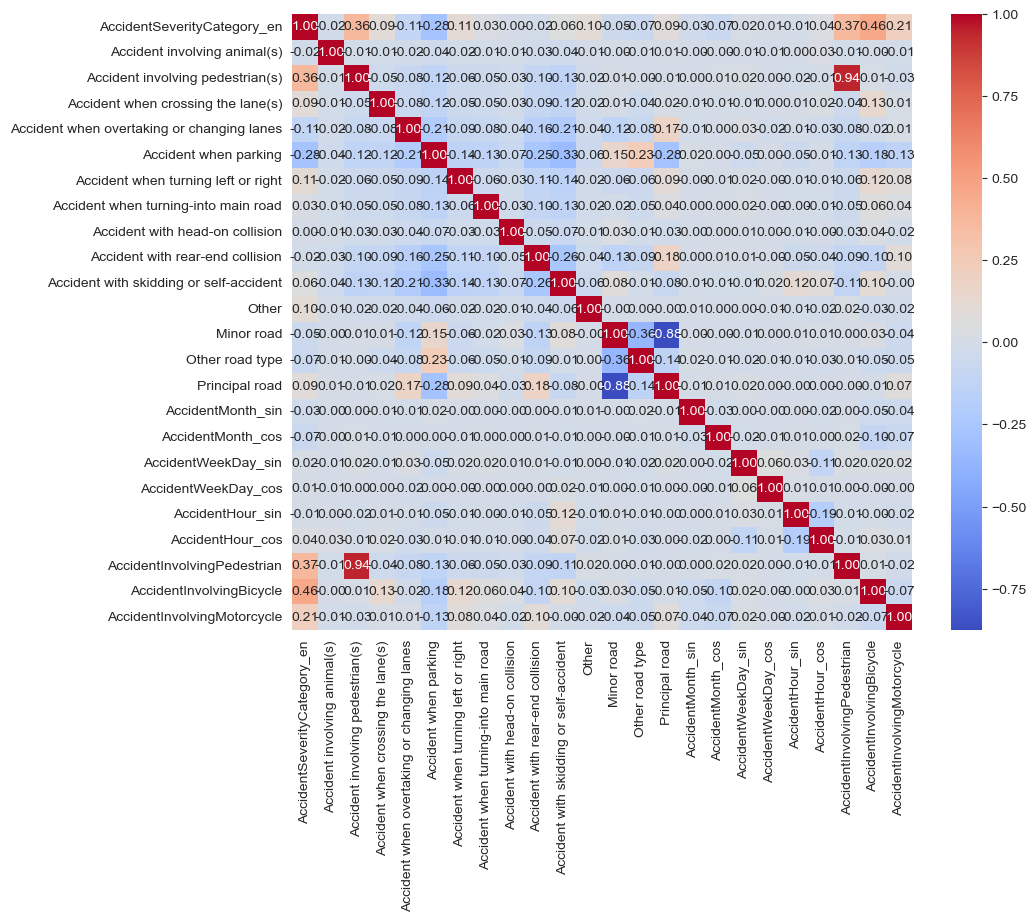

In [25]:
correlation_matrix = data_transformed.corr()
# print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [26]:
# # create a list of all column names
# column_names = data_transformed.columns
# 
# # plot the data
# for col_name in column_names:
#     fig, ax = plt.subplots()
#     sns.stripplot(y = data_transformed['AccidentSeverityCategory_en'], x = data_transformed[col_name], jitter=0.1)
#     ax.set_ylabel('AccidentSeverityCategory_en')
#     ax.set_xlabel(col_name)
#     plt.show()
# 



# Modelling 


## Ensembles with voting

In [27]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf_SVC = SVC() 
clf_kNN = KNeighborsClassifier() 
clf_RF = RandomForestClassifier()

estimators=[('SVC', clf_SVC), ('kNN', clf_kNN), ('RF', clf_RF)]

voting_clf = VotingClassifier(
    estimators=estimators,
    voting='hard'
)

In [28]:
data_transformed.head()

,AccidentSeverityCategory_en,Accident involving animal(s),Accident involving pedestrian(s),Accident when crossing the lane(s),Accident when overtaking or changing lanes,Accident when parking,Accident when turning left or right,Accident when turning-into main road,Accident with head-on collision,Accident with rear-end collision,...,Principal road,AccidentMonth_sin,AccidentMonth_cos,AccidentWeekDay_sin,AccidentWeekDay_cos,AccidentHour_sin,AccidentHour_cos,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,-0.433884,-0.900969,0.866025,-0.500000,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,-0.974928,-0.222521,-0.965926,-0.258819,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.433884,-0.900969,0.500000,-0.866025,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.5,0.866025,0.433884,-0.900969,-0.258819,-0.965926,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.974928,-0.222521,0.500000,-0.866025,0,0,0


In [29]:
# Preparing Trainig and Test dataframes

from sklearn.model_selection import train_test_split

predictors = data_transformed.drop(columns=['AccidentSeverityCategory_en'])
target = data_transformed['AccidentSeverityCategory_en']

# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)



Scaling is unnecessary, since all data is either binary or scaled between -1 and 1 (trigonometric encoding).

Moreover, since we aren't interested in predicting trends or time-series based analysis (and simply want to use the time information to classify a given case), we can use the standard train-test-split, rather than a time series split.

In [30]:
# Training and predicting the voting ensemble
from sklearn.metrics import accuracy_score

voting_clf.fit(X_train,y_train)
y_pred = voting_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("voting Accuracy: %.3f" % accuracy_score(y_test , y_pred))

#previous 0.290         ##### what were the conditions for this?
#new: 0.831

voting Accuracy: 0.830


- explain previous conditions for the given accuracy

In [31]:
# How do the single estimators perform?

for clf_name, clf in estimators:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("%3s Accuracy: %.3f" % (clf_name,accuracy_score(y_test , y_pred)))

#Previous:
# SVC: 0.327
# kNN: 0.247
# RF:  0.287

#new:
# SVC: 0.843
# kNN: 0.813
# RF:  0.810

SVC Accuracy: 0.843
kNN Accuracy: 0.813
 RF Accuracy: 0.808


It is very likely, that this accuracy does not reflect a well fitted model. Rather, this is probably due to the imbalance of the dataset regarding the number of observations for each target class.

### Calculating Balanced Accuracy

In [32]:
from sklearn.model_selection import cross_validate

def performance(clf):
    ret = cross_validate(clf, data_transformed, target, scoring=["accuracy", "balanced_accuracy"])

    print("accuracy=%.2f; balanced accuracy=%.2f" % (ret['test_accuracy'].mean(), ret["test_balanced_accuracy"].mean()))

In [33]:
performance(voting_clf)

accuracy=1.00; balanced accuracy=0.85


In [34]:
performance(clf_SVC)

accuracy=1.00; balanced accuracy=1.00


In [35]:
performance(clf_kNN)

accuracy=0.98; balanced accuracy=0.69


In [36]:
performance(clf_RF)

accuracy=1.00; balanced accuracy=0.82


                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.89      0.92      0.66      0.90      0.78      0.62     13639
        1.0       0.57      0.57      0.89      0.57      0.71      0.49      3873
        2.0       0.21      0.10      0.98      0.14      0.31      0.09       771
        3.0       0.00      0.00      1.00      0.00      0.00      0.00        35

avg / total       0.79      0.81      0.72      0.80      0.74      0.57     18318



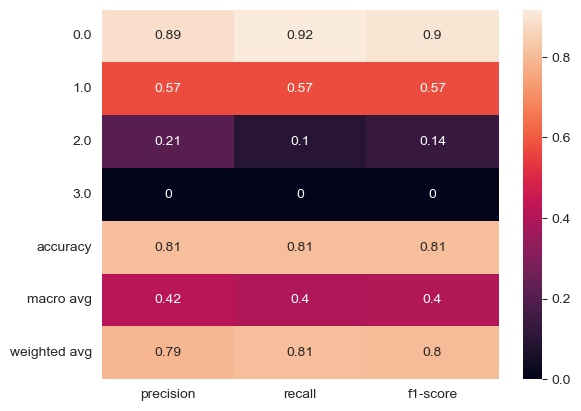

In [37]:
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report

print(classification_report_imbalanced(y_test, y_pred))

# heatmap of classification report
import seaborn as sns
import matplotlib.pyplot as plt

report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
plt.show()



- Plot the classification report as heatmap --> better readable.
 
While balanced accuracy and classification reports generally show good model performance, we can also see, that the minority class 3.0 (accidents so severe they led to fatalities) was never predicted (and thus has no reporting on it). This clearly shows, that the dataset needs to be balanced and stratified sampling should be used.

Having fit this initial naive model, we will now try to improve it by selecting only the relevant features, balancing the dataset, applying regularization and tuning the hyperparameters. We will also perform crossvalidation and check model diagnostics.

## Feature Selection by Feature Importance
- explain why ExtraTreesClassifier is used for the feature selection

/var/folders/yy/vt37z5vs2x579x1sf4g7clhm0000gn/T/ipykernel_17584/3624474070.py:34: RuntimeWarning: invalid value encountered in divide
  plt.bar(X.columns, feature_importance/feature_importance_std)


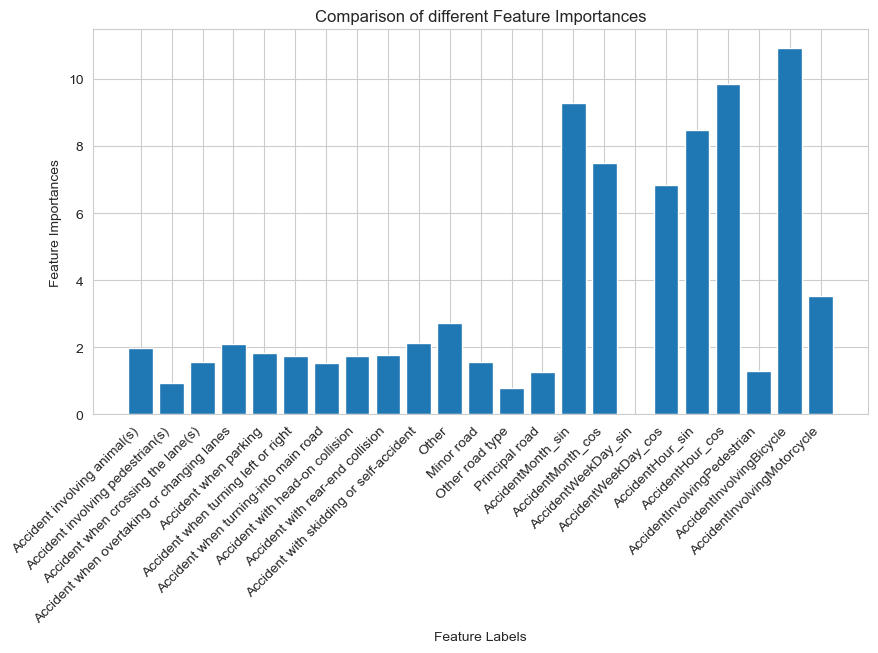

In [38]:
# Load libraries
from sklearn.ensemble import ExtraTreesClassifier

  
# Create features and target
X = predictors
y = target


# Convert to categorical data by converting data to integers
X = X.astype(int)
 
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 50,
                                         criterion ='entropy', 
                                         max_features = 'sqrt',
                                        random_state = 42)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_std = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

feature_importance, feature_importance_std

# Plotting a Bar Graph to compare the models
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(X.columns, feature_importance/feature_importance_std)
plt.xlabel('Feature Labels')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances');


- explain why AccidentWeekDay_sin is 0


Of consistent importance seem accident month, accident day and accident hour, as well as whether bicycles or motorcycles were involved.

Taken together with the correlation matrix, we will keep the "involvement" categories of pedestrians, bicycles and motorcycles, as well as the time-related features.

In [39]:
predictors_new = data_transformed[['AccidentMonth_sin', 'AccidentMonth_cos', 'AccidentWeekDay_sin', 'AccidentWeekDay_cos', 
                                   'AccidentHour_sin', 'AccidentHour_cos', 'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
                                   'AccidentInvolvingMotorcycle']]
predictors_new

,AccidentMonth_sin,AccidentMonth_cos,AccidentWeekDay_sin,AccidentWeekDay_cos,AccidentHour_sin,AccidentHour_cos,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle
0,5.000000e-01,0.866025,-0.433884,-0.900969,0.866025,-5.000000e-01,0,0,0
1,5.000000e-01,0.866025,-0.974928,-0.222521,-0.965926,-2.588190e-01,0,0,0
2,5.000000e-01,0.866025,0.433884,-0.900969,0.500000,-8.660254e-01,0,0,0
3,5.000000e-01,0.866025,0.433884,-0.900969,-0.258819,-9.659258e-01,0,0,0
4,5.000000e-01,0.866025,0.974928,-0.222521,0.500000,-8.660254e-01,0,0,0
...,...,...,...,...,...,...,...,...,...
61053,5.000000e-01,-0.866025,0.781831,0.623490,1.000000,6.123234e-17,0,0,0
61054,1.224647e-16,-1.000000,0.781831,0.623490,-1.000000,-1.836970e-16,0,0,0
61055,8.660254e-01,-0.500000,-0.781831,0.623490,-0.965926,-2.588190e-01,0,0,0
61056,1.224647e-16,-1.000000,0.433884,-0.900969,-1.000000,-1.836970e-16,0,0,0


### Balancing the Data

In [40]:
# Weighing the classes in SVC and RF classifiers

clf_SVC_balanced = SVC(class_weight='balanced', probability=True) 
clf_kNN = KNeighborsClassifier() 
clf_RF_balanced = RandomForestClassifier(class_weight='balanced')

estimators_bl=[('SVC_bl', clf_SVC_balanced), ('kNN', clf_kNN), ('RF_bl', clf_RF_balanced)]

voting_clf_bl = VotingClassifier(
    estimators=estimators_bl,
    voting='soft'
)

- explain why voting is now soft and not hard anymore

In [41]:
# Splitting the data still preserving the frequencies of the target with stratify

X_train, X_test, y_train, y_test = train_test_split(predictors_new, target, stratify = target, test_size=0.3, random_state=42)

In [42]:
y_train.value_counts()

AccidentSeverityCategory_en
0.0    31798
1.0     9104
2.0     1778
3.0       60
Name: count, dtype: int64

In [43]:
# Training and predicting the voting ensemble, now using weighted estimators
from sklearn.metrics import accuracy_score

voting_clf_bl.fit(X_train,y_train)
y_pred = voting_clf_bl.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("voting Accuracy: %.3f" % accuracy_score(y_test , y_pred))

#previous 0.290
#new - naive: 0.830
#new - balanced using class weights: 0.799
#new - balanced using class weights, soft voting: 0.826

voting Accuracy: 0.826


In [44]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.89      0.94      0.65      0.91      0.78      0.63     13629
        1.0       0.62      0.59      0.90      0.60      0.73      0.51      3902
        2.0       0.16      0.04      0.99      0.06      0.20      0.04       762
        3.0       0.00      0.00      1.00      0.00      0.00      0.00        25

avg / total       0.80      0.83      0.72      0.81      0.75      0.58     18318



Also assessing an majority-undersampling approach
- why is the minority class also undersampled? (only 25 from 85?) does this make sense?

In [45]:
# Undersampling overrepresented classes.
from imblearn.under_sampling import RandomUnderSampler

# Considering the new selection of predictive features
X_train, X_test, y_train, y_test = train_test_split(predictors_new, target, stratify = target, test_size=0.3, random_state=42)

# Oversampling the minority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [46]:
# Also using classifiers which consider class weights

voting_clf_bl.fit(X_resampled,y_resampled)
y_pred = voting_clf_bl.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("voting Accuracy: %.3f" % accuracy_score(y_test , y_pred))

#previous 0.290
#new - naive: 0.830
#new - balanced, soft (Majority Undersampling): 0.673 - but very quick!

voting Accuracy: 0.675


In [47]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.89      0.81      0.71      0.85      0.76      0.58     13629
        1.0       0.54      0.28      0.94      0.37      0.51      0.24      3902
        2.0       0.12      0.24      0.92      0.16      0.47      0.20       762
        3.0       0.01      0.52      0.87      0.01      0.67      0.44        25

avg / total       0.78      0.67      0.77      0.72      0.69      0.49     18318



In [59]:
# Using a SMOTE approach to synthesize underrepresented classes

from imblearn.over_sampling import SMOTE 

# Considering the new selection of predictive features
X_train, X_test, y_train, y_test = train_test_split(predictors_new, target,  stratify = target, test_size=0.3, random_state=42)

# Oversampling the minority class
smote = SMOTE() 
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [60]:
# Preparing Trainig and Test dataframes

# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.3, random_state=42)

In [61]:
# Training and predicting the voting ensemble
from sklearn.metrics import accuracy_score

voting_clf_bl.fit(X_train,y_train)
y_pred = voting_clf_bl.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("voting Accuracy: %.3f" % accuracy_score(y_test , y_pred))

#previous 0.290
#new - naive: 0.830
#new - balanced (SMOTE) - no class weights: 0.829 - extremely long training time of 1800+ seconds!
#new - balanced, soft (SMOTE) - class weights: 0.842

voting Accuracy: 0.844


In [63]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.74      0.92      0.89      0.82      0.91      0.82      9540
        1.0       0.81      0.62      0.95      0.70      0.77      0.57      9539
        2.0       0.86      0.85      0.96      0.86      0.90      0.80      9540
        3.0       0.98      0.99      0.99      0.99      0.99      0.99      9539

avg / total       0.85      0.84      0.95      0.84      0.89      0.79     38158



In [64]:
y_pred_proba = voting_clf_bl.predict_proba(X_test)

In [65]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo') 
print("ROC AUC Score on Test Set: %.3f" % roc_auc)

ROC AUC Score on Test Set: 0.959


SMOTE-based oversampling to even out the numbers of observations, together with stratified sampling when splitting the data, has achieved very promising results overall, with promising model performance reports. Going forward, we will combine the SMOTE oversampling and the class balance argument of SVC and RF to ensure robust handling of imbalance.

Majority class undersampling, while extremely fast, did not produce satisfactory results.

## Hyperparameter Tuning

This step will further refine the model parameters. Importantly, we will optimize the three classifiers to combat potential overfitting.

In [67]:
# Further split dataset for initial tuning to reduce training time
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42, stratify=y_train)


In [68]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score


clf_SVC_balanced = SVC(class_weight='balanced', probability=True) 
clf_kNN = KNeighborsClassifier() 
clf_RF_balanced = RandomForestClassifier(class_weight='balanced')

estimators_bl=[('svc', clf_SVC_balanced), ('knn', clf_kNN), ('rf', clf_RF_balanced)]

voting_clf_bl = VotingClassifier(
    estimators=estimators_bl,
    voting='soft'
)

# Define the parameter grid for each base model
param_grid_svc = {'svc__C': [0.1, 1, 10]}
param_grid_rf = {'rf__max_depth': [None, 10, 20], 'rf__min_samples_split': [2, 10]}
param_grid_knn = {'knn__n_neighbors': [3, 5, 7]}

# Combine parameter grids into a single grid for VotingClassifier
param_grid = {**param_grid_svc, **param_grid_rf, **param_grid_knn}

# Making a custom scorer to optimize ROC AUC and precision
#roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovo')

def custom_scorer(y_true, y_pred_proba): 
    roc_auc = roc_auc_score(y_true, y_pred_proba, multi_class='ovo') 
    pr_auc = average_precision_score(y_true, y_pred_proba)
    return 0.5 * roc_auc + 0.5 * pr_auc # Adjust weights as needed

custom_scorer_fn = make_scorer(custom_scorer, needs_proba=True)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=voting_clf_bl, 
                                  param_grid=param_grid, 
                                  cv=5, 
                                  #scoring=roc_auc_scorer,
                                  scoring=custom_scorer_fn,       
                           #factor=2, #number of candidates discarded each iteration
                                  n_jobs=-1) #using all available cpu cores
                                  #min_resources='exhaust', #using all available data for each candidate
                                  #random_state=42)
grid_search.fit(X_train_small, y_train_small)

# Best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)



/opt/miniconda3/envs/MLCO2/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Best Hyperparameters:  {'knn__n_neighbors': 3, 'rf__max_depth': 20, 'rf__min_samples_split': 2, 'svc__C': 10}
Best Cross-Validation Score:  0.8390225557275315


In [69]:
# Use the best estimator
best_voting_clf = grid_search.best_estimator_
best_voting_clf.fit(X_train, y_train)
y_pred = best_voting_clf.predict(X_test)

# Model Accuracy
print("Optimized Voting Accuracy: %.3f" % accuracy_score(y_test, y_pred))


Optimized Voting Accuracy: 0.851


In [70]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='weighted')

np.float64(0.8476624950006172)

In [72]:
y_pred_proba = best_voting_clf.predict_proba(X_test)

#ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo') 
print("ROC AUC Score on Test Set: %.3f" % roc_auc)

ROC AUC Score on Test Set: 0.962


In [77]:
# Precision-Recall Curve AUC Score
pr_auc = average_precision_score(y_test, y_pred_proba)

print("Precision Recall Curve AUC Score on Test Set: %.3f" % pr_auc)

Precision Recall Curve AUC Score on Test Set: 0.895


In [78]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.93      0.90      0.83      0.91      0.83      9540
        1.0       0.81      0.63      0.95      0.71      0.77      0.58      9539
        2.0       0.88      0.85      0.96      0.87      0.91      0.81      9540
        3.0       0.98      0.99      0.99      0.99      0.99      0.99      9539

avg / total       0.85      0.85      0.95      0.85      0.90      0.80     38158



In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.93      0.83      9540
         1.0       0.81      0.63      0.71      9539
         2.0       0.88      0.85      0.87      9540
         3.0       0.98      0.99      0.99      9539

    accuracy                           0.85     38158
   macro avg       0.85      0.85      0.85     38158
weighted avg       0.85      0.85      0.85     38158



## Confusion Matrix

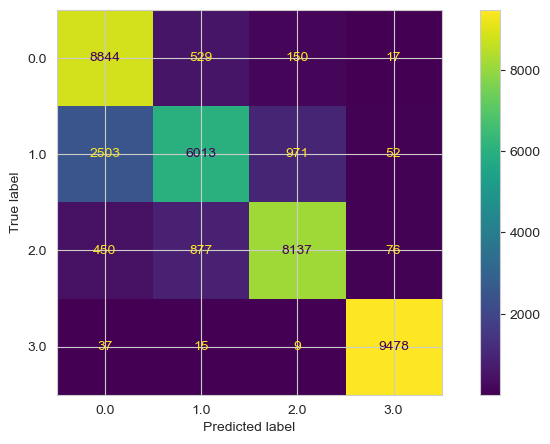

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=best_voting_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_voting_clf.classes_)
disp.plot(); 

# ROC Curve

In [83]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plot_roc_curve(fpr, tpr)

ValueError: multiclass format is not supported

# But so far:

Feature selection! done

Balancing the Dataset not done yet => look for best option and inform => SMOTE or class weight in classifiers
done => SMOTE showed clearly superior performance.


Hyperparameter Tuning will also involve regularization! basically, the classifiers we're using have anti-overfit measures in limiting tree depth etc. in this way, we can tune the hyperparameters of the classifiers to achieve optimal results there.

Best Hyperparameters:  {'knn__n_neighbors': 5, 'rf__max_depth': None, 'rf__min_samples_split': 2, 'svc__C': 10}
Best Cross-Validation Score:  0.8400030392085309

CV - (time based take year back in => as date time to do tscv)

Learning Curves

Model Diagnostics and Evaluation - what to check? Classification report, confusion matrix, AURC Plot. F1 Score + Recall, precision, accuracy etc etc.

Explicability => "strong maybe (not)" :P

